In [ ]:
! apt-get update
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-extra cm-super

In [2]:
import math

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{libertine}', r'\RequirePackage[libertine]{newtxmath}'] 
mpl.rc('font', family='serif')

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rc
from cycler import cycler

mpl.rcParams['ps.usedistiller'] = 'xpdf' 

plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['legend.fontsize'] = '15'
plt.rcParams['xtick.labelsize'] = '15'
plt.rcParams['ytick.labelsize'] = '15'

monochrome=(cycler('color', sns.color_palette("husl", 8))*2+(cycler('marker', ['v', 's', "o"])*7)[0:16])
plt.rc('axes', prop_cycle=monochrome)

pd.options.display.max_rows = 999

Setting rcParams['ps.usedistiller'] to 'xpdf' requires xpdf.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
masterdata = pd.read_csv("/content/drive/MyDrive/GMCDE/experiments/power/CPowerDE/2022-01-15-21-46_CPowerDE_scala/CPowerDE_scala.csv")

In [5]:
masterdata.head(10)

,genId,type,dim,noise,num_it,estimator,avg_c,std_c,power90,power95,power99
0,linear-l-4-0.13-gaussian-0,undiluted,4,0.13,50,R,1.000000,5.559386e-12,1.0000,1.0000,1.0000
1,linear-l-4-0.07-gaussian-0,undiluted,4,0.07,50,R,1.000000,0.000000e+00,1.0000,1.0000,1.0000
2,linear-l-4-0.0-gaussian-0,undiluted,4,0.00,50,R,1.000000,0.000000e+00,1.0000,1.0000,1.0000
3,linear-l-4-0.1-gaussian-0,undiluted,4,0.10,50,R,1.000000,1.308783e-17,1.0000,1.0000,1.0000
4,linear-l-4-0.47-gaussian-0,undiluted,4,0.47,50,R,0.797399,5.211543e-02,0.9999,0.9980,0.9790
5,linear-l-4-0.53-gaussian-0,undiluted,4,0.53,50,R,0.751348,5.509167e-02,0.9973,0.9872,0.8797
6,linear-l-4-0.57-gaussian-0,undiluted,4,0.57,50,R,0.724826,5.701815e-02,0.9877,0.9555,0.7556
7,linear-l-4-0.4-gaussian-0,undiluted,4,0.40,50,R,0.866527,4.561948e-02,1.0000,1.0000,0.9997
8,linear-l-4-0.5-gaussian-0,undiluted,4,0.50,50,R,0.773996,5.328662e-02,0.9993,0.9949,0.9449
9,linear-l-4-0.17-gaussian-0,undiluted,4,0.17,50,R,1.000000,3.233762e-07,1.0000,1.0000,1.0000


In [6]:
masterdata["genId"] = [x.split("-")[1] for x in masterdata["genId"]]

In [7]:
masterdata.head(10)

,genId,type,dim,noise,num_it,estimator,avg_c,std_c,power90,power95,power99
0,l,undiluted,4,0.13,50,R,1.000000,5.559386e-12,1.0000,1.0000,1.0000
1,l,undiluted,4,0.07,50,R,1.000000,0.000000e+00,1.0000,1.0000,1.0000
2,l,undiluted,4,0.00,50,R,1.000000,0.000000e+00,1.0000,1.0000,1.0000
3,l,undiluted,4,0.10,50,R,1.000000,1.308783e-17,1.0000,1.0000,1.0000
4,l,undiluted,4,0.47,50,R,0.797399,5.211543e-02,0.9999,0.9980,0.9790
5,l,undiluted,4,0.53,50,R,0.751348,5.509167e-02,0.9973,0.9872,0.8797
6,l,undiluted,4,0.57,50,R,0.724826,5.701815e-02,0.9877,0.9555,0.7556
7,l,undiluted,4,0.40,50,R,0.866527,4.561948e-02,1.0000,1.0000,0.9997
8,l,undiluted,4,0.50,50,R,0.773996,5.328662e-02,0.9993,0.9949,0.9449
9,l,undiluted,4,0.17,50,R,1.000000,3.233762e-07,1.0000,1.0000,1.0000


In [8]:
masterdata["genId"].unique()

array(['l', 'si_5.0', 'si_1.0', 'hs', 'ho', 'hc', 'st', 'hcg', 'dl_0.25',
       'lp_2.0', 'cr', 'zi'], dtype=object)

In [9]:
masterdata["estimator"].unique()

array(['R', 'ItGIBEV'], dtype=object)

In [10]:
masterdata["dim"].unique()

array([ 4,  6,  8, 10, 12, 14, 16])

In [11]:
genIds = ['l','dl_0.25','lp_2.0','si_1.0', 'si_5.0','hc','hcg','hs','cr','st','ho','zi']
#genIds = ['l','si_1.0','hs','st']

In [12]:
prettynames = {
    'si_5.0': "S5", 
    'si_1.0': "S1", 
    'hs': "Hs", 
    'st': "St", 
    'dl_0.25': "Dl", 
    'zi': "Zi", 
    'i': "I", 
    'hcg': "HcG", 
    'hc': "Hc", 
    'ho': "H", 
    'cr': "C",
    "l" : "L",
    "lp_2.0":"Lp"
}

In [13]:
master_undiluted = masterdata[(masterdata["num_it"] == 50) & (masterdata["type"] == "undiluted")]
master_diluted = masterdata[(masterdata["num_it"] == 50) & (masterdata["type"] == "diluted")]

In [14]:
def score_plot(selectedData, nDim, num_it, diluted_true_or_false):
  vars = ['R', 'ItGIBEV']
  var_name = "estimator"
  avg = "avg_c"
  std = "std_c"

  num_vars = len(vars)
  num_genIds = len(genIds)
  fig, axes = plt.subplots(nrows=2, ncols=num_vars, figsize=(7*num_vars, 7), sharey=False, sharex=True)
  axess = axes.reshape(-1)
  data_type = "Diluted" if diluted_true_or_false else "Undiluted"
  fig.suptitle(f"Distribution of Dependency Measure scores, {nDim} Dimensions, {num_it} iterations, {data_type} data", fontsize = 30, y = 1.1)

  for i,var in enumerate(vars):
      subdata = selectedData[(selectedData[var_name] == var)  & (selectedData["dim"] == nDim)]
      d = subdata.groupby(["noise","genId"]).mean()[avg].reset_index()
      dd = d.set_index(["noise", "genId"]).unstack("noise")
      dd.columns = dd.columns.droplevel(0)
      dd = dd.reindex(genIds)
      dd = dd.rename(index={genId: prettynames[genId] for genId in genIds})

      
      ax = axess[i]

      sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), vmax=dd.max().max(),
                      xticklabels=[format(x, '.2f') for x in dd.columns.values.round(2)], 
                      ax=ax)

      ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)
      
      ax.set_title(r'%s'%(var))
      ax.set_ylabel("")
      
      sp = [""]*int(((len(ax.get_xticklabels())-6)/5))
      ax.set_xticklabels(["0"] + sp + ["0.2"] + sp + ["0.4"] + sp + ["0.6"] + sp + ["0.8"] + sp + ["1"])
      
      ax.set_xlabel("")
      if(i==0):
          ax.set_ylabel("avg")
      else:
          ax.set_ylabel("")

  for i,var in enumerate(vars):
      subdata = selectedData[(selectedData[var_name] == var)  & (selectedData["dim"] == nDim)]
      d = subdata.groupby(["noise","genId"]).mean()[std].reset_index()
      dd = d.set_index(["noise", "genId"]).unstack("noise")
      dd.columns = dd.columns.droplevel(0)
      dd = dd.reindex(genIds)
      dd = dd.rename(index={genId: prettynames[genId] for genId in genIds})
      
      ax = axess[i+num_vars]
      
     
      sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100),
              xticklabels=[format(x, '.2f') for x in dd.columns.values.round(2)], ax=ax)
      
      ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)
      
      ax.set_title("")
      ax.set_ylabel("")
      labels = ["" for x in range(0,31)]
      labels[0] = "0"
      labels[-1] = "1"
      labels[int(len(labels)/2)] = r'$\leftarrow \sigma \rightarrow $'
      ax.set_xticklabels(labels, rotation = 0)
      ax.set_xlabel('')
      
      if(i==0):
          ax.set_ylabel("std")
      else:
          ax.set_ylabel("")
      
  plt.tight_layout()

In [48]:
def power_plot(est, title, filename):
  %matplotlib inline

  num_genIds = len(genIds)
  variable = "estimator"
  measure = "power95"
  fig, axes = plt.subplots(nrows=num_genIds, ncols=2, figsize=(16, 2.3*num_genIds), sharey=True, sharex=True)
  fig.suptitle(title, fontsize = 50, y = 0.92)
  axess = axes.reshape(-1)
  cbar_ax1 = fig.add_axes([.95, 0.14, .01, 0.72])
  cbar_ax1.tick_params(labelsize=20)
  yticklabels = [f"{k}-d" for k in range(4,17,2)]

  def plotini(masterdata,est, genId, i):
    ax = axess[i]
    subdata = masterdata[(masterdata["estimator"] == est) & (masterdata["genId"] == genId)]
    d = subdata.groupby(["noise","dim"]).mean()[measure].reset_index()
    dd = d.set_index(["noise", "dim"]).unstack("noise")
    dd.columns = dd.columns.droplevel(0)

    plt.sca(axess[i])

    sns.heatmap(dd, vmin=0.0, vmax=1.0, cmap=sns.color_palette("RdBu", 100), ax = ax, 
                    xticklabels=3,
                    cbar=True,
                cbar_ax=cbar_ax1,
                linewidths=0.01,
                linecolor='grey',
                yticklabels = yticklabels)

    if(i == 0):
        ax.set_title("Undiluted", fontsize = 30)

    if(i == 1):
        ax.set_title("Diluted", fontsize = 30)
      
    if((i % 2) == 0):
        ax.set_ylabel(prettynames[genId],  rotation=0, labelpad=30, fontsize = 30)
    else:
        ax.set_ylabel("")
            
    labels = ["" for x in range(0,11)]
    labels[0] = "0"
    labels[-1] = "1"
    labels[5] = r"$\sigma$"
    labels[3] = r"$\leftarrow$"
    labels[7] = r"$\rightarrow$"
    ax.set_xticklabels(labels,  rotation=0, fontsize = 25)
    ax.set_xlabel('', labelpad=0)


  i = 0
  for genId in genIds:
      plotini(master_undiluted,est ,genId, i)
      i += 1
      plotini(master_diluted,est ,genId, i)
      i += 1
  plt.savefig(filename)
  

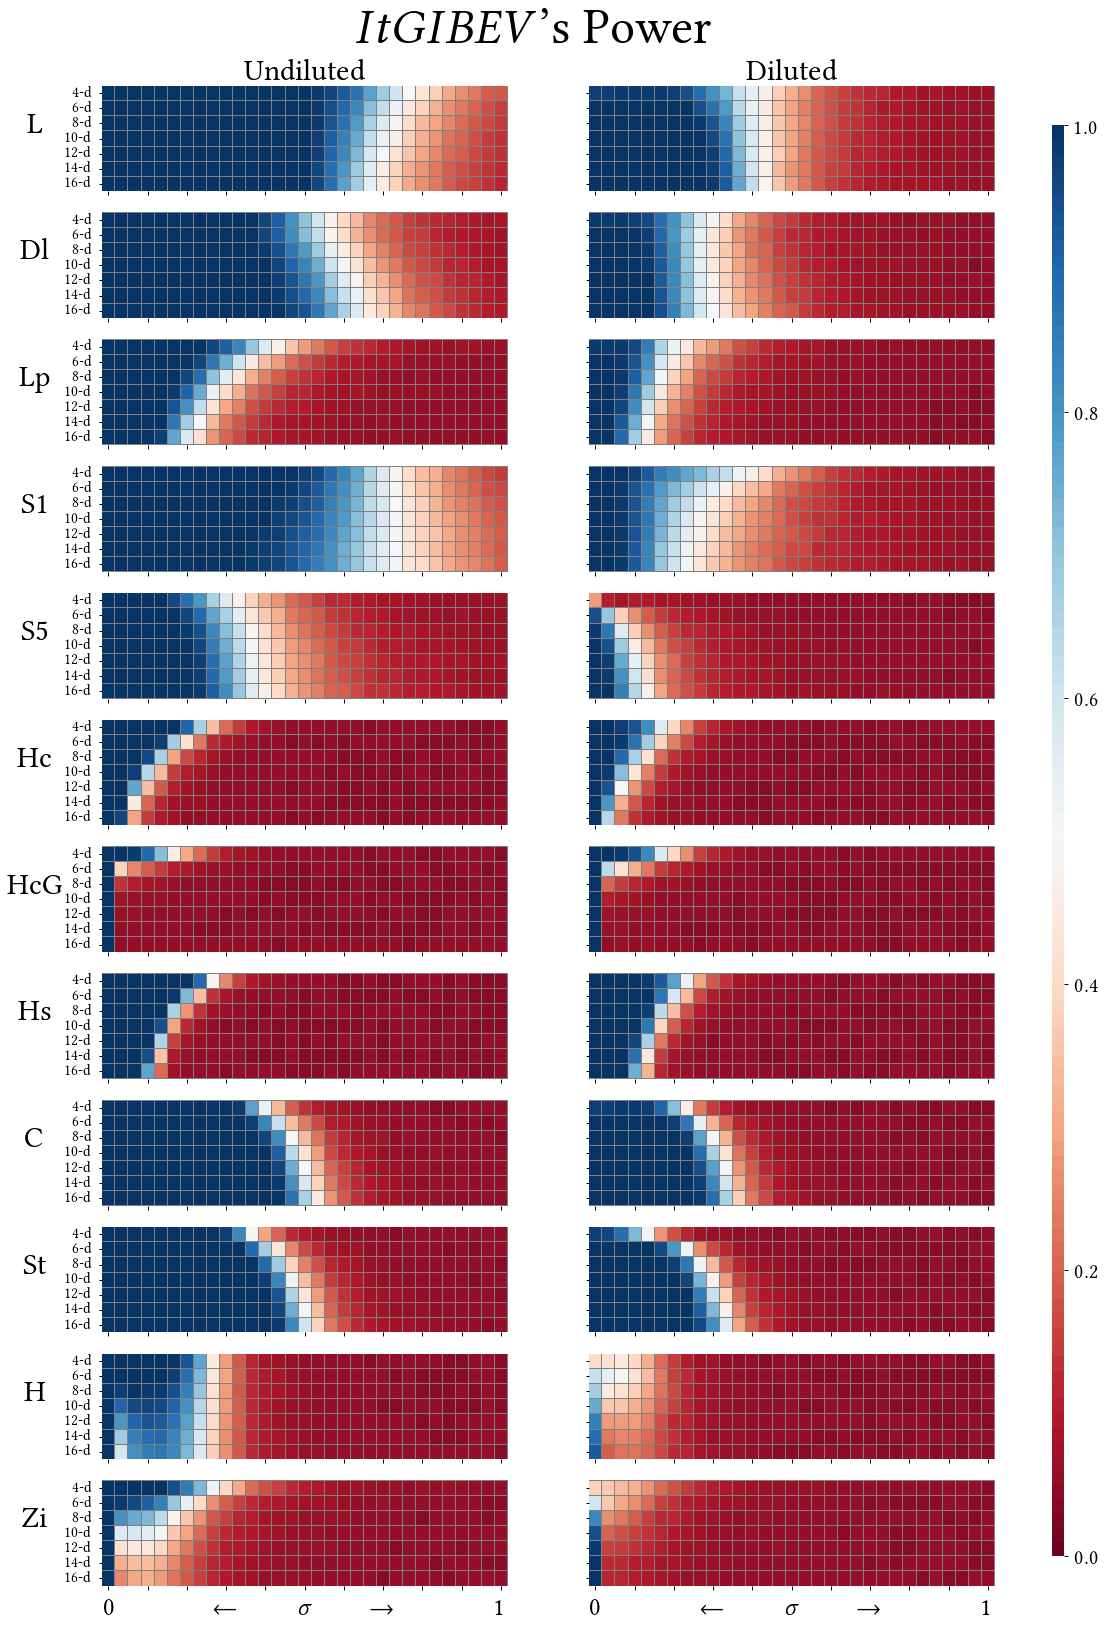

In [52]:
power_plot("ItGIBEV",r"$ItGIBEV$'s Power","defc_power_R")

In [50]:
def power95_compare():
  %matplotlib inline

  num_genIds = len(genIds)
  variable = "estimator"
  measure = "power95"
  to_compare = "R"
  benchmark = "ItGIBEV"
  fig, axes = plt.subplots(nrows=num_genIds, ncols=2, figsize=(16, 2.3*num_genIds), sharey=True, sharex=True)
  fig.suptitle(r"$ItGIBEV$'s Power - $R$'s Power", fontsize = 50, y = 0.92)
  axess = axes.reshape(-1)
  mask_threshold = 0.5
  cbar_ax1 = fig.add_axes([.95, 0.14, .01, 0.72])
  cbar_ax1.tick_params(labelsize=20)
  yticklabels = [f"{k}-d" for k in range(4,17,2)]

  def plot_difference(masterdata, genId, i):
    ax = axess[i]
    ### bad estimator subdata
    subdata_bad = masterdata[(masterdata[variable] == to_compare) & (masterdata["genId"] == genId)]

    # the mask to the bad estimator
    d_bad_mask = subdata_bad.groupby(["noise","dim"]).mean()[measure].reset_index()
    d_bad_mask.loc[(d_bad_mask.power95 <= mask_threshold),measure] = 0.0
    d_bad_mask.loc[(d_bad_mask.power95 != 0.0),measure] = 1.0
    
    # the power of the bad estimator
    d_bad = subdata_bad.groupby(["noise","dim"]).mean()[measure].reset_index()
    # dd_bad = d_bad.set_index(["noise", "dim"]).unstack("noise")

    ### good estimator subdata
    subdata_good = masterdata[(masterdata[variable] == benchmark) & (masterdata["genId"] == genId)]

    # the mask of the good estimator
    d_good_mask = subdata_good.groupby(["noise","dim"]).mean()[measure].reset_index()
    d_good_mask.loc[(d_good_mask.power95 <= mask_threshold),measure] = 0.0
    d_good_mask.loc[(d_good_mask.power95 != 0.0),measure] = 1.0
    
    # the power of the bad estimator
    d_good = subdata_good.groupby(["noise","dim"]).mean()[measure].reset_index()
    # dd_good = d_good.set_index(["noise", "dim"]).unstack("noise")

    ### the power of the good/estimator/bad estimator
    d_quotient = d_good.copy()
    # d_quotient["power"] = d_good["power"] / d_bad["power"]
    # d_quotient.loc[(d_quotient.power >= 1), "power"] = 1
    # d_quotient.loc[(d_quotient.power < 1), "power"] = -1
    d_quotient[measure] = d_good[measure] - d_bad[measure]
    dd_quotient = d_quotient.set_index(["noise", "dim"]).unstack("noise")

    ### the combined mask
    d_mask = d_good_mask.copy()
    d_mask[measure] = d_good_mask[measure] + d_bad_mask[measure]
    d_mask.loc[(d_mask.power95 > 0), measure] = 2 #to avoid conflict with True == 1, False == 0
    d_mask.loc[(d_mask.power95 == 0), measure] = -2
    d_mask.loc[(d_mask.power95 == 2), measure] = False
    d_mask.loc[(d_mask.power95 == -2), measure] = True
    dd_mask = d_mask.set_index(["noise", "dim"]).unstack("noise").to_numpy()

    ### the final power
    # 1 -> good >= bad
    # -1 -> good <= bad
    # 0 -> ignored by mask because for both estimators power <= 0.5
    # dd = dd_quotient * dd_mask
    # dd.columns = dd.columns.droplevel(0)
    dd = dd_quotient

    lim = np.absolute(dd.max().max())
    
    sns.heatmap(dd,
                #vmin = -lim,vmax=lim,
                #cmap=sns.color_palette("Blues", 100),
                cmap="Blues",
                ax = ax, 
                xticklabels=3,
                cbar=True,
                cbar_ax=cbar_ax1,
                mask = dd_mask,
                linewidths=0.01,
                linecolor='grey',
                yticklabels = yticklabels)
    ax.set_facecolor("mistyrose")

    if(i == 0):
        ax.set_title("Undiluted", fontsize = 30)

    if(i == 1):
        ax.set_title("Diluted", fontsize = 30)
      
    if((i % 2) == 0):
        ax.set_ylabel(prettynames[genId],  rotation=0, labelpad=30, fontsize = 30)
        #ax.set_yticklabels(yticklabels,  rotation=0)
    else:
        ax.set_ylabel("")
            
    labels = ["" for x in range(0,11)]
    labels[0] = "0"
    labels[-1] = "1"
    labels[5] = r"$\sigma$"
    labels[3] = r"$\leftarrow$"
    labels[7] = r"$\rightarrow$"
    ax.set_xticklabels(labels,  rotation=0, fontsize = 25)
    ax.set_xlabel('', labelpad=0)


  i = 0
  for genId in genIds:
      plot_difference(master_undiluted, genId, i)
      i += 1
      plot_difference(master_diluted, genId, i)
      i += 1
  plt.savefig("power_diff")
  

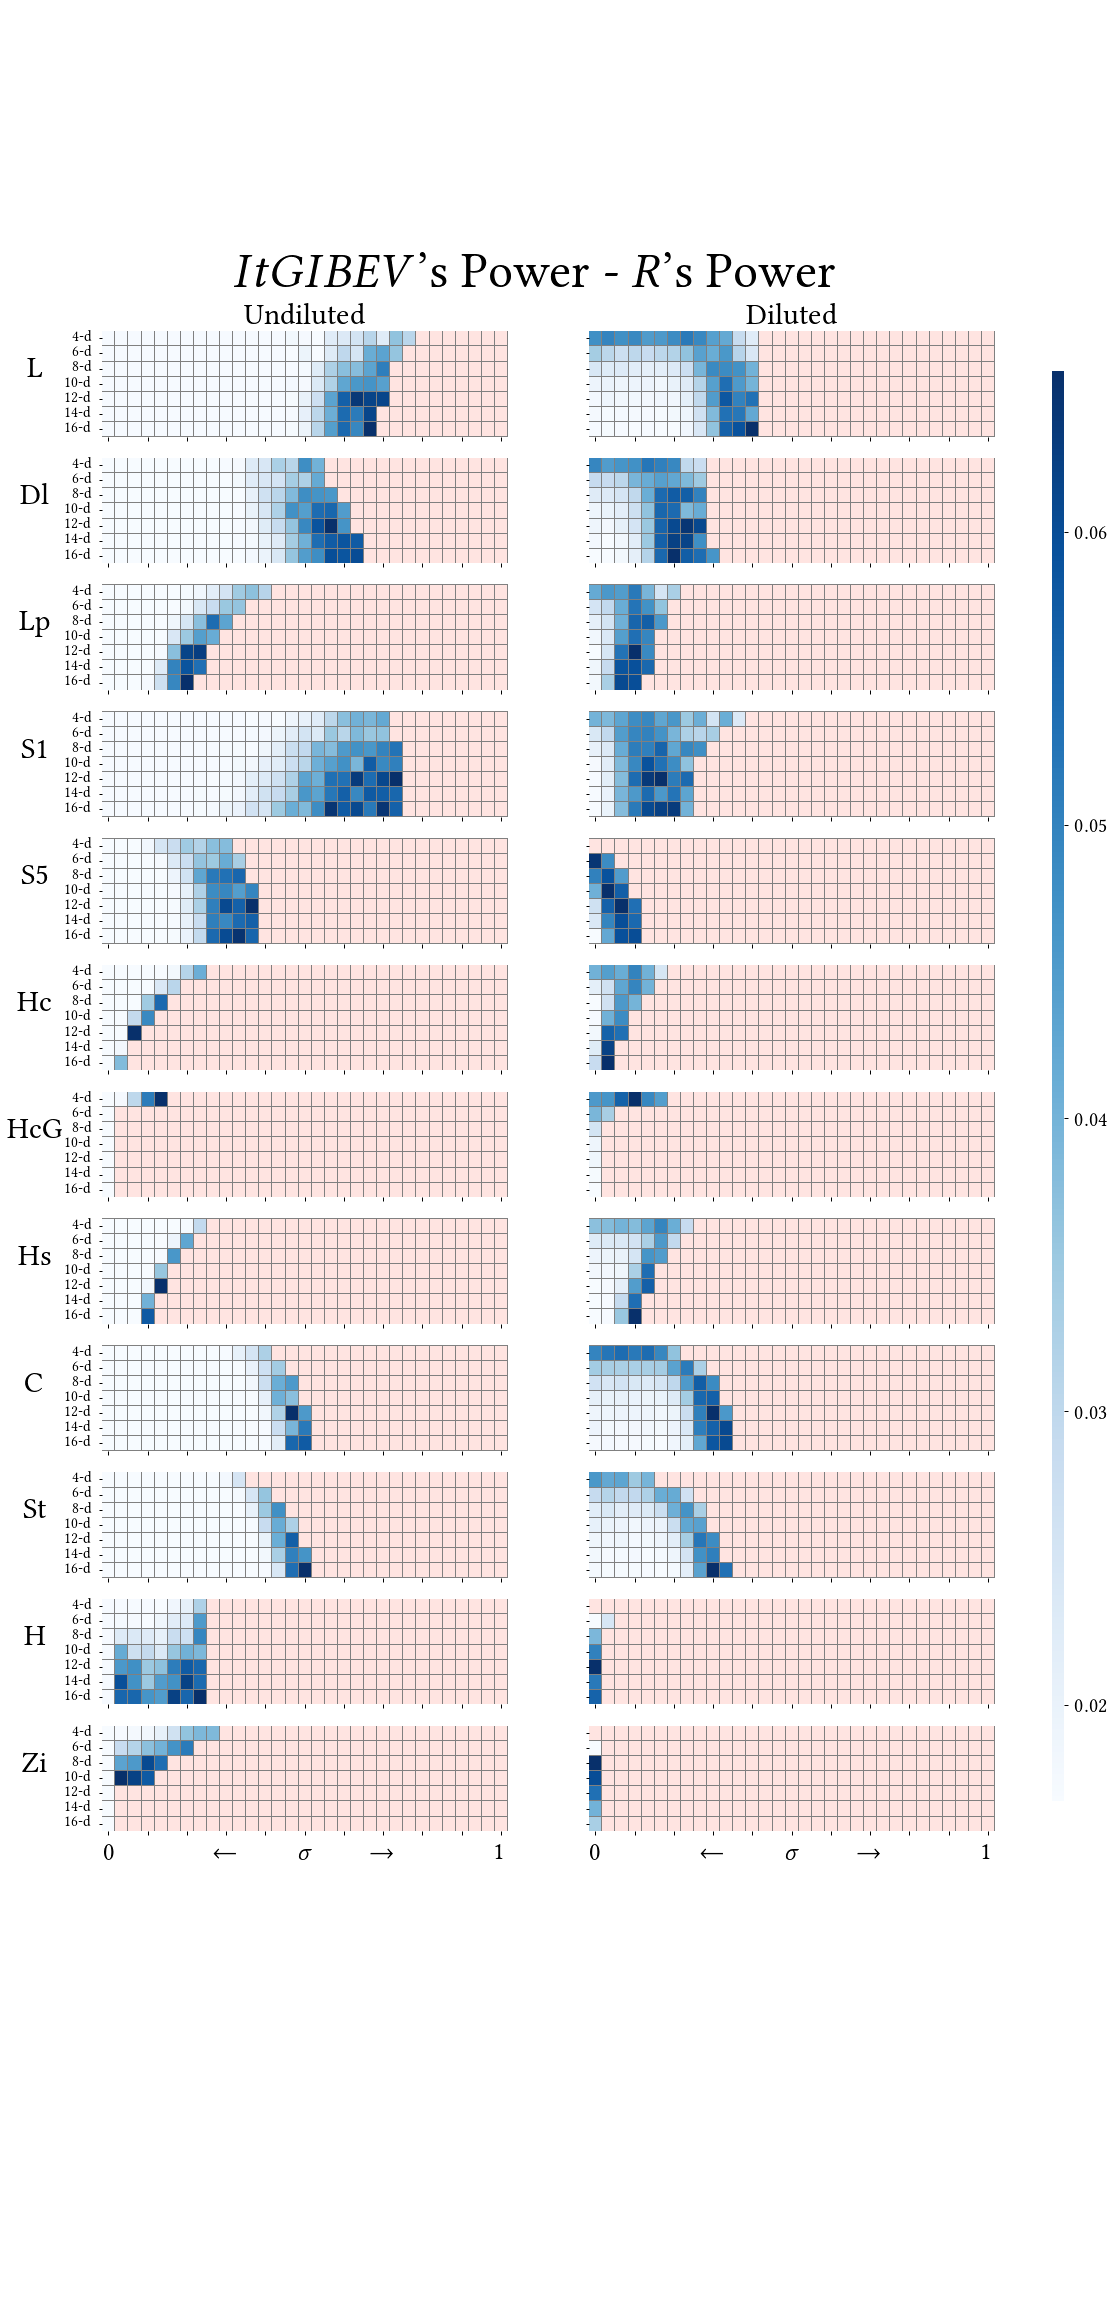

In [51]:
power95_compare()